In [1]:
import scipy
print(scipy.__version__)
%matplotlib inline

1.1.0


In [2]:
import cellgrid 
import numpy as np
import itertools
from initialization import init_uniform

In [3]:
def cg_select(box, points, maxdist):
    indx,dist = cellgrid.capped_self_distance_array(points,maxdist,box=box)
    mask = np.where(dist<maxdist)
    return indx[mask],dist[mask]

In [12]:
#Benchmarking Time ---------> Cutoff Radius
#Setup
box = np.array([100,100,100,90,90,90],dtype=np.float32)
Npoints = np.logspace(2,3,num=2,dtype=np.int32)
Max_Dist = np.linspace(10,30,num=2)
#maxdist = np.array([10])
#maxdist

In [96]:
time_cgpair = []
for npt,maxdist in list(itertools.product(Npoints,Max_Dist)):
    box1, points = init_uniform(box,npt)
    print("Npoints",npt,"Cutoff_radius",maxdist)
    cgpair = %timeit -o -q -n 5 -r 3 cg_select(box1,points,maxdist)
    print("Average Timing",cgpair.average,"Standard Deviation",cgpair.stdev)
    time_cgpair.append([npt,maxdist,cgpair.average,cgpair.stdev])
print(time_cgpair)

Npoints 100 Cutoff_radius 10.0
Average Timing 0.13890186666637117 Standard Deviation 0.001757206998304513
Npoints 100 Cutoff_radius 30.0
Average Timing 0.007755933333100984 Standard Deviation 0.0004671647342291544
Npoints 1000 Cutoff_radius 10.0
Average Timing 0.2259455999999773 Standard Deviation 0.003301252445030422
Npoints 1000 Cutoff_radius 30.0
Average Timing 0.020466666666470703 Standard Deviation 0.0016316973765767722
[[100, 10.0, 0.13890186666637117, 0.001757206998304513], [100, 30.0, 0.007755933333100984, 0.0004671647342291544], [1000, 10.0, 0.2259455999999773, 0.003301252445030422], [1000, 30.0, 0.020466666666470703, 0.0016316973765767722]]


In [55]:
arr = np.array(time_cgpair)

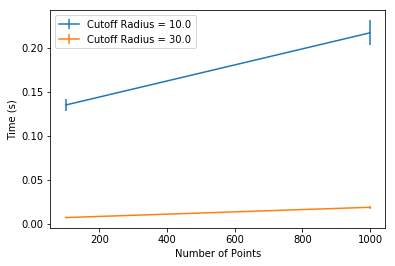

In [94]:
import matplotlib
import matplotlib.pyplot as plt
for maxdist in Max_Dist:
    mask = (arr[:,1]==maxdist)
    npt,avg,sd = (arr[mask,:][:,0]),(arr[mask,:][:,2]),(arr[mask,:][:,3])
    plt.errorbar(npt,avg,yerr=sd,label='Cutoff Radius = {}'.format(maxdist))
    plt.legend()
    plt.xlabel('Number of Points')
    plt.ylabel('Time (s)')